<a href="https://colab.research.google.com/github/avii-001/Python_Projects/blob/main/EducationAdaptability_kusumm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/hackathon/students_adaptability_level_online_education.csv")

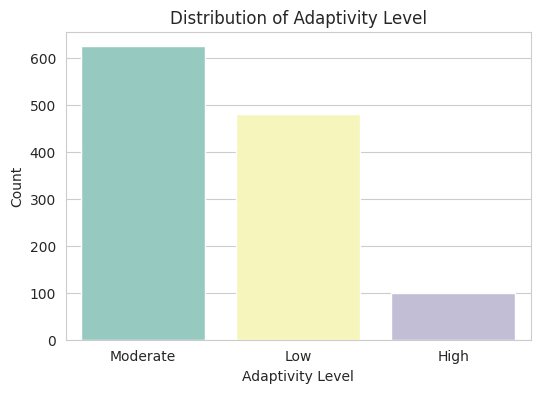

In [ ]:
# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Adaptivity Level", palette="Set3")
plt.title("Distribution of Adaptivity Level")
plt.xlabel("Adaptivity Level")
plt.ylabel("Count")
plt.show()

In [ ]:
# Plot the distribution of adaptivity levels
fig = px.histogram(df, x='Adaptivity Level', color='Adaptivity Level', title='Distribution of Adaptivity Levels')
fig.show()

In [ ]:

# Plot adaptivity level by gender
fig = px.histogram(df, x='Adaptivity Level', color='Gender', barmode='group', title='Adaptivity Level by Gender')
fig.show()

In [ ]:
# Plot adaptivity level by education level
fig = px.histogram(df, x='Adaptivity Level', color='Education Level', barmode='group', title='Adaptivity Level by Education Level')
fig.show()

In [ ]:
fig = px.histogram(df, x='Age', color='Adaptivity Level', facet_col='Gender', title='Adaptivity Level by Age and Gender')
fig.show()

In [ ]:
fig = px.bar(
    df,
    x='Institution Type',
    color='Adaptivity Level',
    title='Adaptivity Level by Institution Type')
fig.show()

In [ ]:
# Pie chart with custom color palette
fig = px.pie(
    df,
    names='Internet Type',
    title='Distribution of Internet Types')
fig.show()

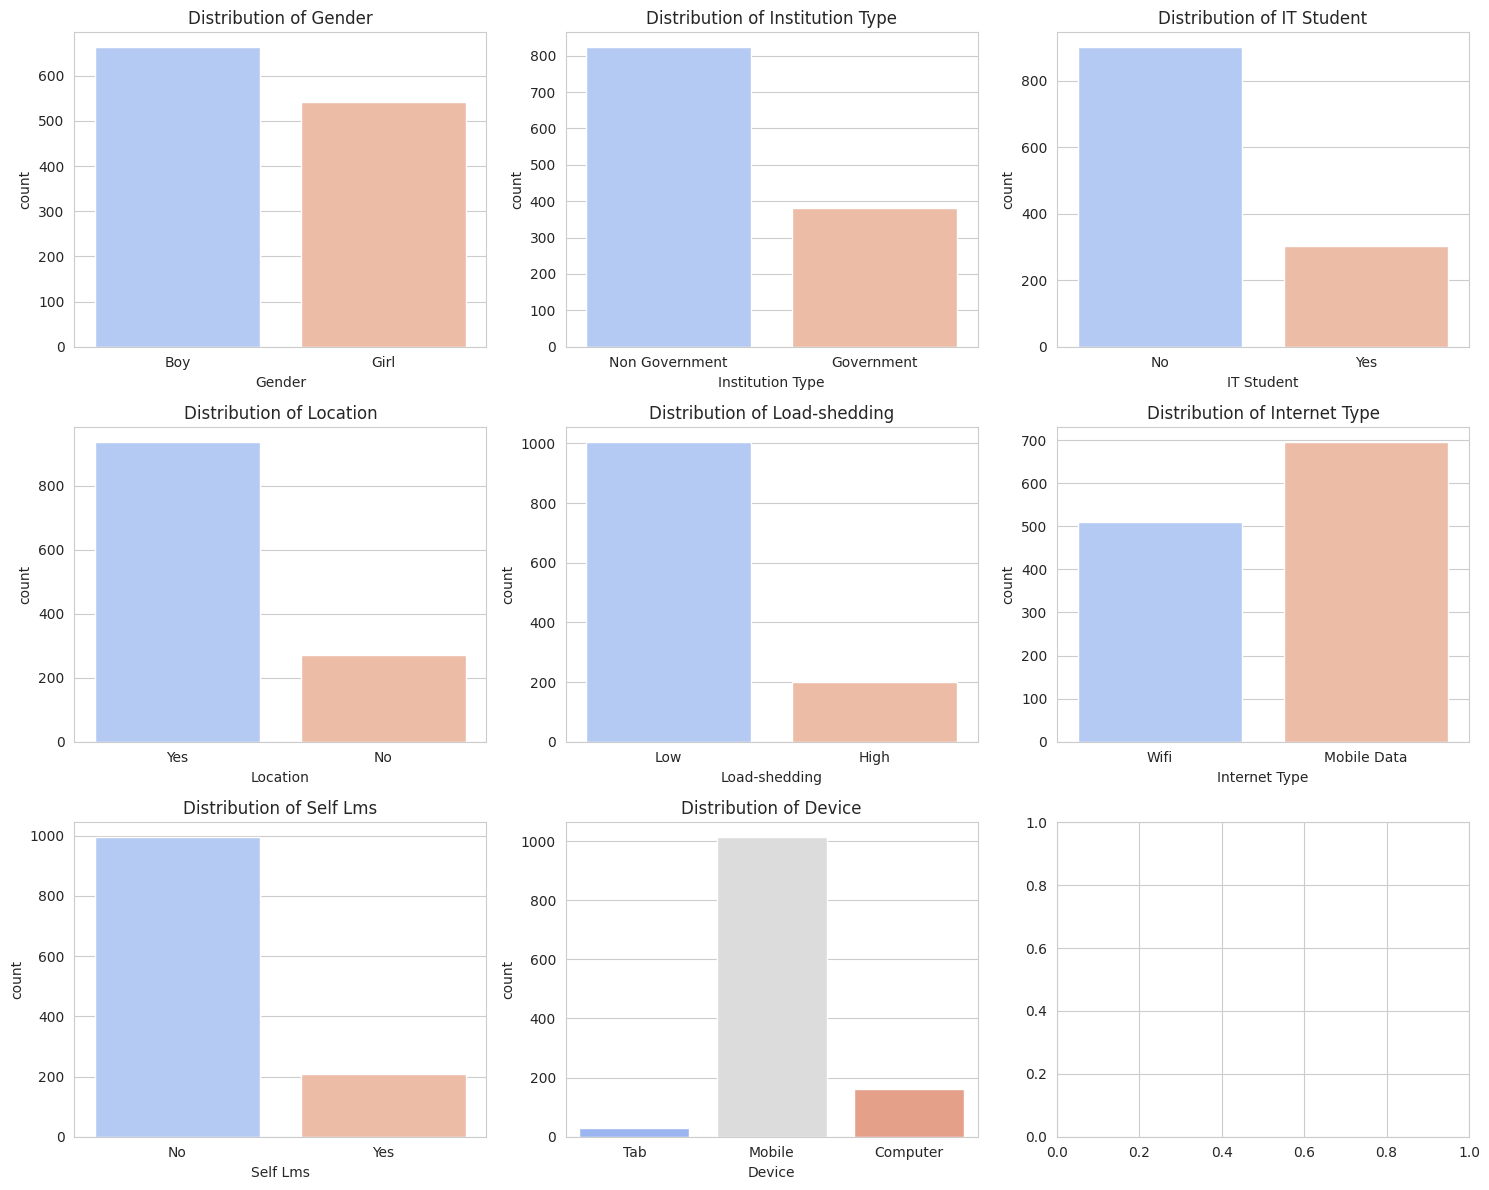

In [ ]:
# Chatgpted milauna parxa


# Set style for seaborn
sns.set_style("whitegrid")

# 🔹 1. Count Plots for Categorical Variables
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
categorical_columns = ["Gender", "Institution Type", "IT Student", "Location", "Load-shedding", "Internet Type", "Self Lms", "Device"]

for i, col in enumerate(categorical_columns):
    row, col_idx = divmod(i, 3)
    sns.countplot(data=df, x=col, palette="coolwarm", ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

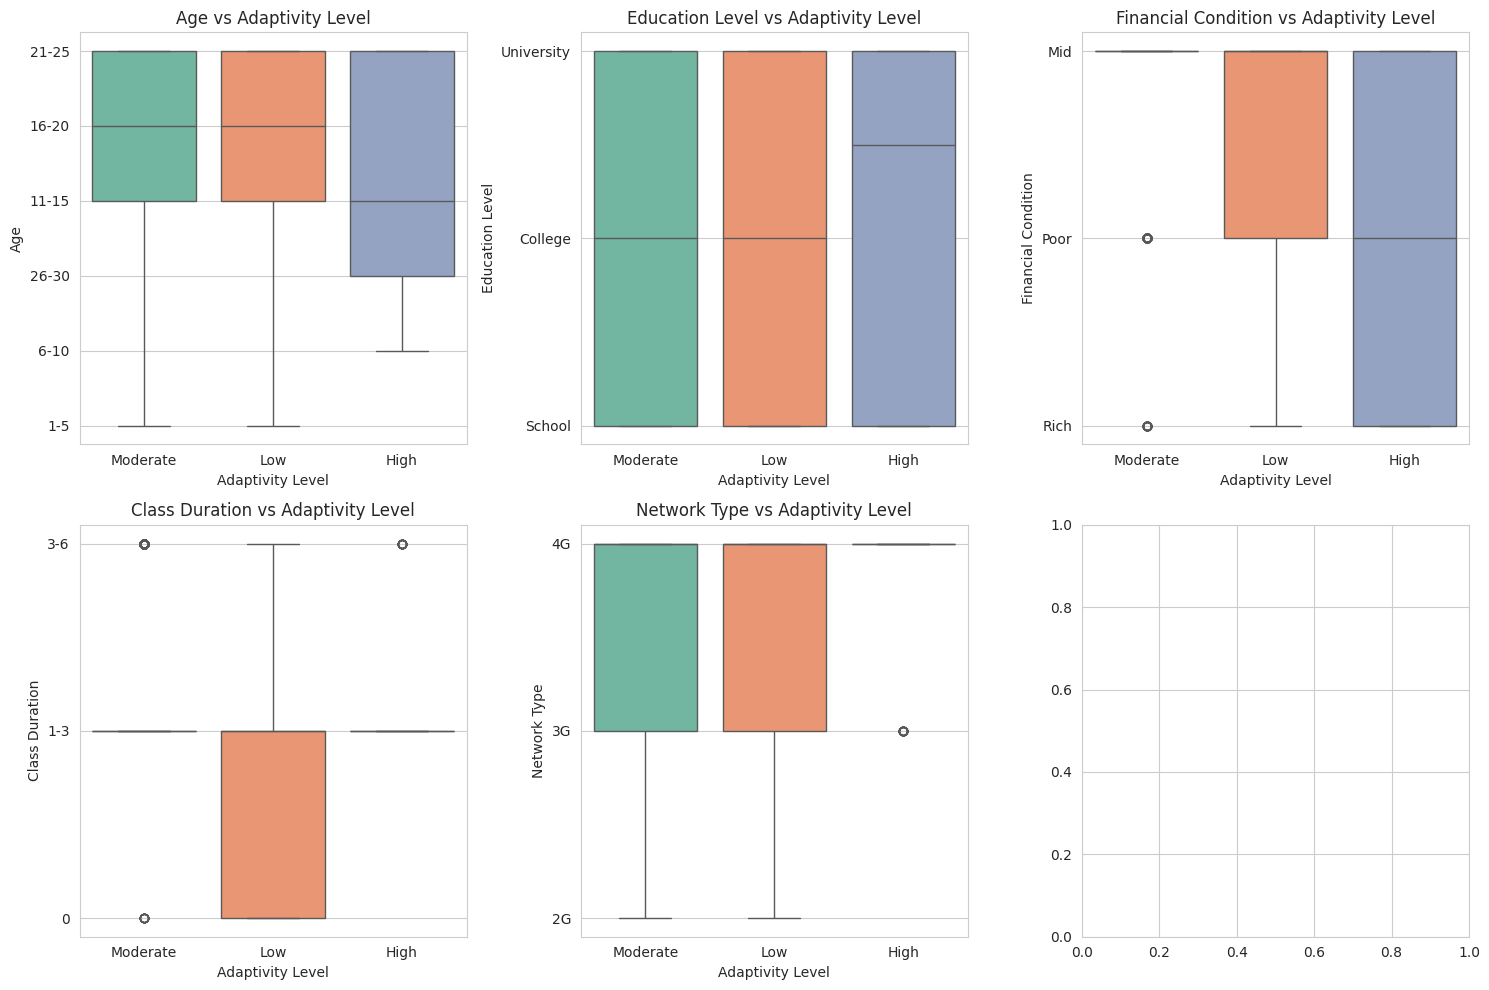

In [ ]:
#chatgpted milaunu parxa

# 🔹 3. Boxplots to See Distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
numerical_columns = ["Age", "Education Level", "Financial Condition", "Class Duration", "Network Type"]

for i, col in enumerate(numerical_columns):
    row, col_idx = divmod(i, 3)
    sns.boxplot(data=df, x="Adaptivity Level", y=col, palette="Set2", ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"{col} vs Adaptivity Level")

plt.tight_layout()
plt.show()


# After visualization hai

In [ ]:
# Define and order ordinal encoder for categorical features
ordinal_mappings = {
    "Age": ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30'],
    "Education Level": ['School', 'College', 'University'],
    "Financial Condition": ['Poor', 'Mid', 'Rich'],
    "Class Duration": ['0', '1-3', '3-6'],
    "Network Type": ['2G', '3G', '4G']
}

In [ ]:
list(ordinal_mappings.keys())

['Age',
 'Education Level',
 'Financial Condition',
 'Class Duration',
 'Network Type']

In [ ]:
df[list(ordinal_mappings.keys())]

,Age,Education Level,Financial Condition,Class Duration,Network Type
0,4.0,2.0,1.0,2.0,2.0
1,4.0,2.0,1.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0
3,2.0,0.0,1.0,1.0,2.0
4,3.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1200,3.0,1.0,1.0,1.0,2.0
1201,3.0,1.0,1.0,2.0,2.0
1202,2.0,0.0,1.0,1.0,1.0
1203,3.0,1.0,1.0,1.0,2.0


In [ ]:
# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_mappings])    #encodes in ordered way
df[list(ordinal_mappings.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_mappings.keys())])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode binary and nominal categorical features using Label Encoding
label_cols = ["Gender", "Institution Type", "IT Student", "Location", "Load-shedding", "Internet Type", "Self Lms", "Device"]
label_encoder = LabelEncoder()

for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Encode target variable (Adaptivity Level)
df["Adaptivity Level"] = label_encoder.fit_transform(df["Adaptivity Level"])

In [ ]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,4.0,2.0,1,0,1,1,1.0,1,2.0,2.0,0,2,2
1,1,4.0,2.0,1,0,1,0,1.0,0,2.0,1.0,1,1,2
2,1,3.0,1.0,0,0,1,1,1.0,1,2.0,1.0,0,1,2
3,1,2.0,0.0,1,0,1,1,1.0,0,2.0,1.0,0,1,2
4,1,3.0,0.0,1,0,1,1,0.0,0,1.0,0.0,0,1,1


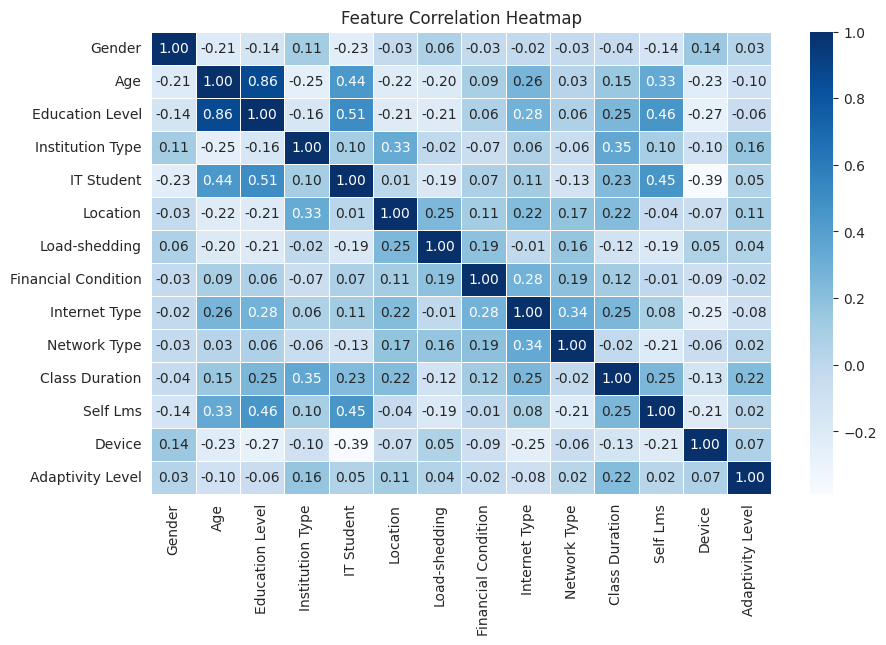

In [ ]:
#Heatmap of Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop(columns=["Adaptivity Level"])
y = df["Adaptivity Level"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

Model Accuracy: 90.87%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.91      0.92      0.91        96
           2       0.91      0.94      0.92       125

    accuracy                           0.91       241
   macro avg       0.92      0.85      0.88       241
weighted avg       0.91      0.91      0.91       241

